In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
histo_val = []
histo_tick = []
with open('../results/cpu', 'r') as f:
    histo = f.read().strip()
histo = histo[histo.find('Histogram:\n'):].split('\n')
histo = histo[1:]
for h in histo:
    h = h.strip()
    tk, vl = map(float, h.split(' '))
    histo_tick.append(tk)
    histo_val.append(vl)
histo_sum = sum(histo_val)
histo_val = list(map(lambda x: x / histo_sum, histo_val))

In [3]:
np_tick = np.arange(20000, 1000000) / 1000000 * 40
np_val = np.exp(-np_tick)

In [4]:
Rmin, Rmax = 0, 20

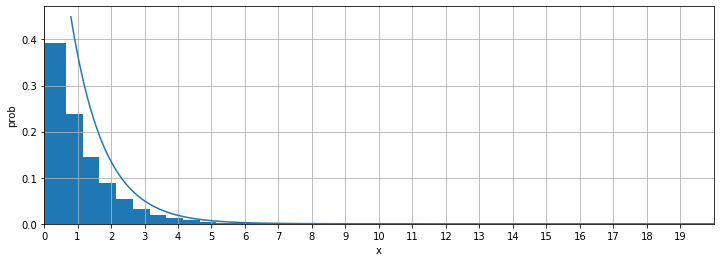

In [5]:
plt.figure(figsize=(12,4))
plt.xlim(Rmin, Rmax)
plt.xticks(range(Rmin, Rmax))
plt.grid(True)
plt.bar(histo_tick, histo_val)
plt.plot(np_tick, np_val)
plt.xlabel('x')
plt.ylabel('prob')
plt.savefig("images/prob.pdf") 

In [6]:
def retrieve_time(s):
    return float(s.split(': ')[1].split('(ms)')[0])
def parse_file(path):
    with open(path, 'r') as fp:
        s = fp.read().split('\n')
    return list(map(retrieve_time, s[9:12]))

In [7]:
labels = ["shmem", "gmem"]
block_sizes = [40,80,160,320,640]
grid_sizes = [1,2,4,8,16,32,64,128,256,512,2048,4096]
res = dict()
for label in labels:
    res[label] = [np.zeros((len(block_sizes), len(grid_sizes))) for _ in [0]*4]
    for i, block_size in enumerate(block_sizes):
        for j, grid_size in enumerate(grid_sizes):
            ts = parse_file(f'../results/{label}_{block_size}_{grid_size}')
            for k, t in enumerate(ts):
                res[label][k][i,j] = t
            res[label][3][i,j] = res[label][0][i,j] + res[label][1][i,j] + res[label][2][i,j]

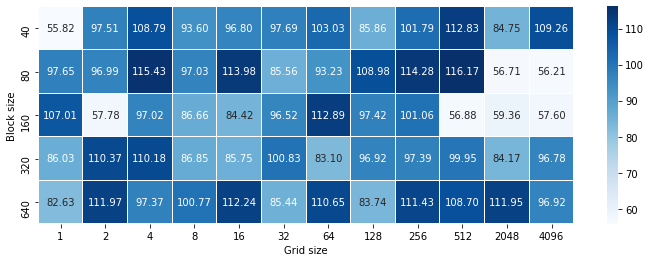

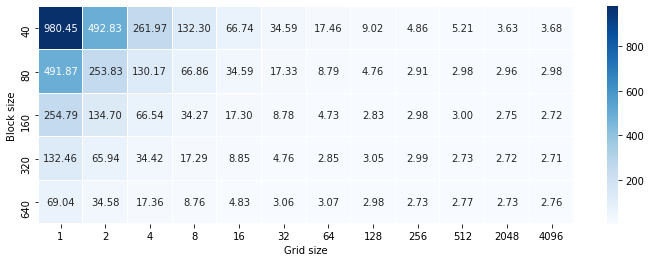

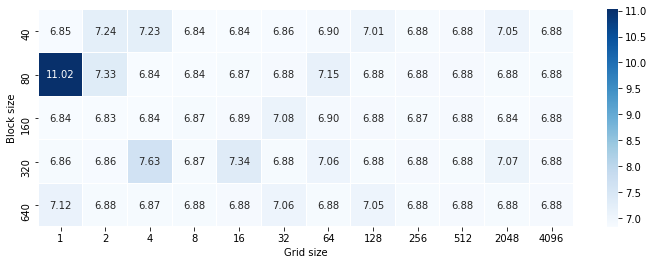

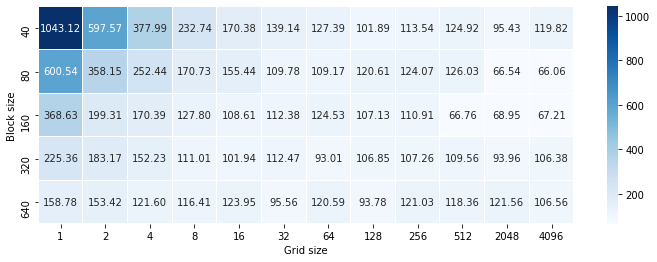

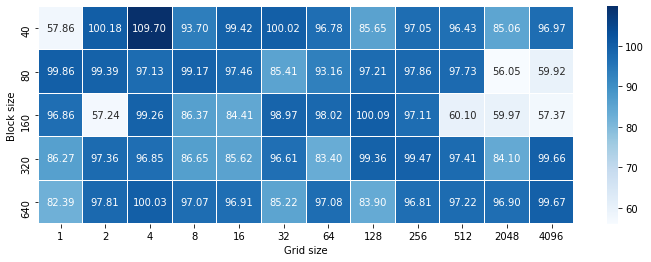

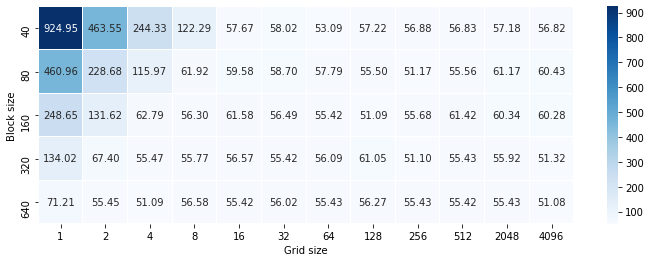

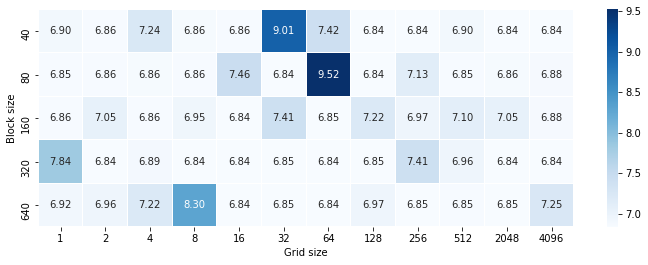

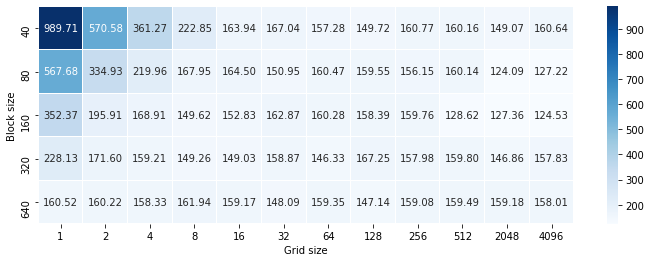

In [8]:
for label in labels:
    for i, lb in enumerate(['input', 'gpu', 'output', 'total']):
        fig, ax = plt.subplots(figsize=(12,4))
        ax = sns.heatmap(res[label][i], annot=True, cmap="Blues",
                        fmt=".2f", xticklabels=grid_sizes,
                        yticklabels=block_sizes, linewidths=.005)
        plt.xlabel('Grid size')
        plt.ylabel('Block size')
        plt.savefig(f'images/{label}_{lb}.pdf') 